In [152]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [153]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [154]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [155]:
Base.classes.keys()

['measurement', 'station']

In [156]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [157]:
#use inspector to explore the database and print the table names
inspector = inspect(engine)

inspector.get_table_names()

['measurement', 'station']

In [158]:
#use inspector to explore database and print table names
columns = inspector.get_columns('measurement')

for col in columns:
    print(col['name'], col['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


## D1: Determine the Summary Statistics for June

In [159]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters/extract the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
print(june_temps[2].tobs)





78.0


In [161]:
#  3. Convert the June temperatures to a list.
june_temps_list = [(i.date, i.tobs) for i in june_temps]
print(june_temps_list)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [162]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 

# # Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(june_temps_list, columns=['date','june_temps'])
print(df)


            date  june_temps
0     2010-06-01        78.0
1     2010-06-02        76.0
2     2010-06-03        78.0
3     2010-06-04        76.0
4     2010-06-05        77.0
...          ...         ...
1695  2017-06-26        79.0
1696  2017-06-27        74.0
1697  2017-06-28        74.0
1698  2017-06-29        76.0
1699  2017-06-30        75.0

[1700 rows x 2 columns]


In [163]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,june_temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


<AxesSubplot:>

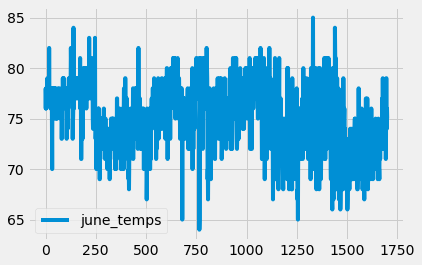

In [164]:
#use matplotlib to display data in a visual way
df.plot()

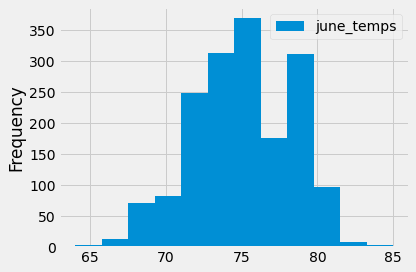

In [165]:
#create a histogram to visually plot summary stats - June
june_temps_hist = df.plot.hist(bins=12)
plt.tight_layout()

## D2: Determine the Summary Statistics for December

In [166]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()
print(dec_temps[2].tobs)


74.0


In [167]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [(i.date, i.tobs) for i in dec_temps]
#print(dec_temps_list)

In [168]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(dec_temps_list, columns=['date','dec_temps'])
print(df)

            date  dec_temps
0     2010-12-01       76.0
1     2010-12-03       74.0
2     2010-12-04       74.0
3     2010-12-06       64.0
4     2010-12-07       64.0
...          ...        ...
1512  2016-12-27       71.0
1513  2016-12-28       71.0
1514  2016-12-29       69.0
1515  2016-12-30       65.0
1516  2016-12-31       65.0

[1517 rows x 2 columns]


In [169]:
# 9. Calculate and print out the summary statistics for the December temperature DataFrame.
df.describe()

,dec_temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


<AxesSubplot:>

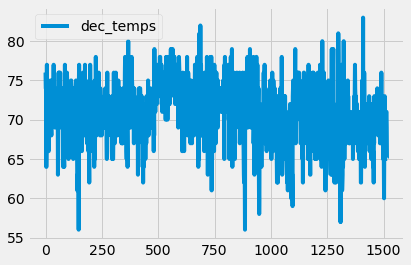

In [170]:
#use matplotlib to display data in a visual way
df.plot()

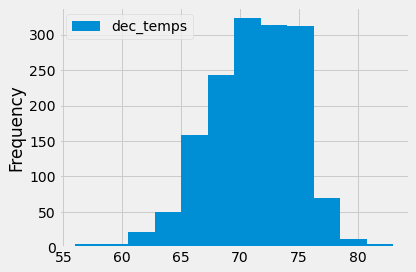

In [171]:
#create a histogram to visually plot summary stats - Dec
dec_temps = df.plot.hist(bins=12)
plt.tight_layout()

In [175]:
june_temps = df.describe()
dec_temps = df.describe()

summary_df = dec_temps.merge(june_temps, left_index=True, right_index=True)
summary_df


,dec_temps_x,dec_temps_y
count,1517.000000,1517.000000
mean,71.041529,71.041529
std,3.745920,3.745920
min,56.000000,56.000000
25%,69.000000,69.000000
50%,71.000000,71.000000
75%,74.000000,74.000000
max,83.000000,83.000000


In [177]:
#create a query to include measurement, station, and temp data for additional analysis of data
june_station = session.query(Measurement.tobs, Measurement.station, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
print(june_station)

[(78.0, 'USC00519397', 0.0), (76.0, 'USC00519397', 0.01), (78.0, 'USC00519397', 0.0), (76.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (79.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (82.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.0), (76.0, 'USC00519397', 0.02), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (78.0, 'USC00519397', 0.0), (77.0, 'USC00519397', 0.07), (78.0, 'USC00519397', 0.0), (73.0, 'USC00519397', 0.56), (70.0, 'USC00519397', 0.89), (76.0, 'USC00519397', 0.0), (77.0, 'USC005